In [1]:
import cv2

import numpy as np
import pandas as pd
import os
import pickle
import sys

import seaborn as sns
import matplotlib.pyplot as plt
import cooler


from scipy import stats

import re
import sys



from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import scipy
from scipy.stats import pearsonr, spearmanr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error






sys.path.append("/shareb/zliu/analysis/")
from CHARMtools import Cell3D
import imp
imp.reload(Cell3D)
from CHARMtools import imputation
imp.reload(imputation)

/tmp/ipykernel_164295/2264176298.py:35: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'CHARMtools.imputation' from '/shareb/zliu/analysis/CHARMtools/imputation.py'>

In [6]:
def mat_cor(pair):
    mat1, mat2 = pair

    # 去掉对角线，不考虑
    np.fill_diagonal(mat1, np.nan)
    np.fill_diagonal(mat2, np.nan)

    # Calculate distance matrices
    distance_matrix_1 = mat1.flatten()
    distance_matrix_2 = mat2.flatten()

    # Replace inf values with nan
    distance_matrix_1 = np.where(np.isinf(distance_matrix_1), np.nan, distance_matrix_1)
    distance_matrix_2 = np.where(np.isinf(distance_matrix_2), np.nan, distance_matrix_2)

    # Remove any NaN values from both arrays (only where both have NaNs in the same position)
    mask = ~np.isnan(distance_matrix_1) & ~np.isnan(distance_matrix_2)
    distance_matrix_1 = distance_matrix_1[mask]
    distance_matrix_2 = distance_matrix_2[mask]

    # Check if there are any remaining NaNs or infs
    if not np.isfinite(distance_matrix_1).all() or not np.isfinite(distance_matrix_2).all():
        raise ValueError("The input arrays contain infs or NaNs after preprocessing.")

    # Now you can safely call pearsonr and spearmanr
    pearsonr_value, _ = pearsonr(distance_matrix_1, distance_matrix_2)
    spearmanr_value, _ = spearmanr(distance_matrix_1, distance_matrix_2)

    # For ssim and mse, we first need to handle matrices properly since they might contain NaNs now
    # Normalize matrices after setting NaNs to 0 for these calculations
    mat1_norm = np.nan_to_num((mat1 - np.nanmean(mat1)) / np.nanstd(mat1), nan=0)
    mat2_norm = np.nan_to_num((mat2 - np.nanmean(mat2)) / np.nanstd(mat2), nan=0)

    ssmis = ssim(mat1_norm, mat2_norm)
    mse = mean_squared_error(mat1_norm, mat2_norm)

    return [pearsonr_value, spearmanr_value, ssmis, mse]
def plot_matrix(mat,title,cmap,vmin,vmax,show):
    plt.figure(figsize=(4,4))
    plt.imshow(mat,interpolation='nearest',cmap=cmap,vmin=vmin,vmax=vmax)
    if show:
        plt.colorbar()
    plt.title(title)
    #不显示刻度
    plt.xticks([])
    plt.yticks([])
    plt.show()

def scale_matrix_to_range(matrix, min_val=0, max_val=1):

    
    matrix_np = np.array(matrix)
    matrix_np[matrix_np == -np.inf] = np.nan
    matrix_np[matrix_np == np.inf] = np.nan

    min_matrix_val = np.nanmin(matrix_np)
    max_matrix_val = np.nanmax(matrix_np)
    print(min_matrix_val,max_matrix_val)
    # Scale the matrix to the range [min_val, max_val]
    scaled_matrix = (matrix_np - min_matrix_val) / (max_matrix_val - min_matrix_val) * (max_val - min_val) + min_val
    
    return scaled_matrix



In [3]:
copy = 0

## Ground Truth

In [4]:
# target = "Science2018"
target = "Cell2020"
prob_path = f"/shareb/mliu/evaluate_impute/data/simulation_hic/{target}/prob/{target}_prob_matrix.npy"
prob_matrix = np.load(prob_path)
mean_prob_matrix = np.sum(prob_matrix ,axis=0) / prob_matrix.shape[0]

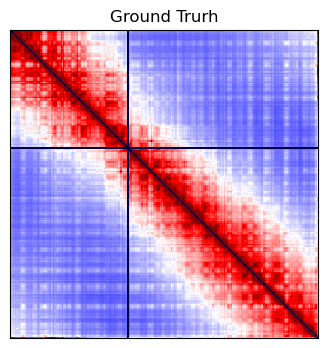

In [68]:
cmap = "seismic"
plot_matrix(scale_matrix_to_range(mean_prob_matrix),f"Ground Trurh",cmap,vmin=0,vmax=0.4,show=False)

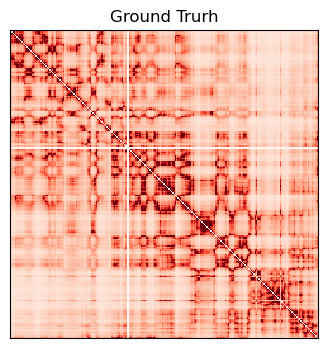

In [7]:
cmap = "Reds"
copy = 0
plot_matrix(scale_matrix_to_range(prob_matrix[copy]),f"Ground Trurh",cmap,vmin=0,vmax=0.1,show=False)

## 0-Raw

In [8]:
target = "Cell2020"
downsample_matrix_dir  = f"/shareb/mliu/evaluate_impute/data/simulation_hic/{target}/hic/matrix"

sample_path1 = f"{downsample_matrix_dir}/{target}_sample_matrix1.npy"
sample_matrix1 = np.load(sample_path1)
mean_sample_matrix1= np.sum(sample_matrix1 ,axis=0) / sample_matrix1.shape[0]

sample_path2 = f"{downsample_matrix_dir}/{target}_sample_matrix2.npy"
sample_matrix2 = np.load(sample_path2)
mean_sample_matrix2= np.sum(sample_matrix2 ,axis=0) / sample_matrix2.shape[0]


sample_path3 = f"{downsample_matrix_dir}/{target}_sample_matrix3.npy"
sample_matrix3 = np.load(sample_path3)
mean_sample_matrix3= np.sum(sample_matrix3 ,axis=0) / sample_matrix3.shape[0]

sample_path4 = f"{downsample_matrix_dir}/{target}_sample_matrix4.npy"
sample_matrix4 = np.load(sample_path4)
mean_sample_matrix4 = np.sum(sample_matrix3 ,axis=0) / sample_matrix4.shape[0]

In [9]:
# cmap = "seismic"
# plot_matrix(scale_matrix_to_range(mean_sample_matrix1),f"Group1",cmap,vmin=0,vmax=0.4,show=False)
# plot_matrix(scale_matrix_to_range(mean_sample_matrix2),f"Group2",cmap,vmin=0,vmax=0.4,show=False)
# plot_matrix(scale_matrix_to_range(mean_sample_matrix3),f"Group3",cmap,vmin=0,vmax=0.4,show=False)
# plot_matrix(scale_matrix_to_range(mean_sample_matrix4),f"Group4",cmap,vmin=0,vmax=0.4,show=False)

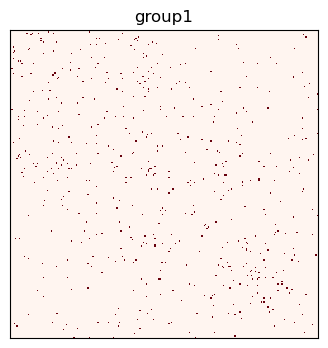

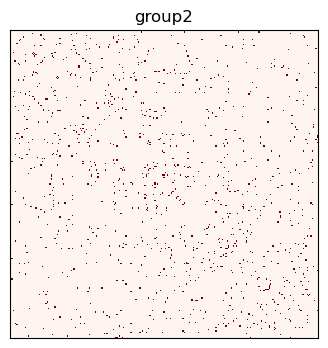

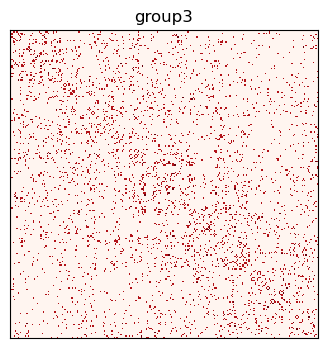

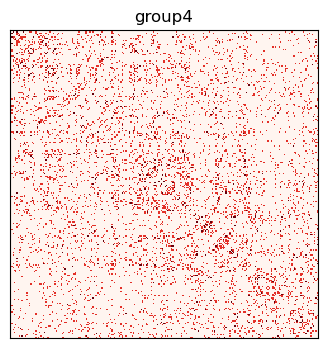

In [13]:
cmap="Reds"
copy = 0
vmax = 0.3
plot_matrix(scale_matrix_to_range(sample_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(sample_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(sample_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(sample_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 1-Hicrep

In [124]:
target = "Cell2020"
hicimpute_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/hicrep"

hicrep_matrix1 = np.load(f"{hicimpute_dir}/hicrep_imputed_{target}_group1.npy")
hicrep_matrix2 = np.load(f"{hicimpute_dir}/hicrep_imputed_{target}_group2.npy")
hicrep_matrix3 = np.load(f"{hicimpute_dir}/hicrep_imputed_{target}_group3.npy")
hicrep_matrix4 = np.load(f"{hicimpute_dir}/hicrep_imputed_{target}_group4.npy")
print(hicrep_matrix4.shape)

(100, 243, 243)


0.0 0.1388888888888889


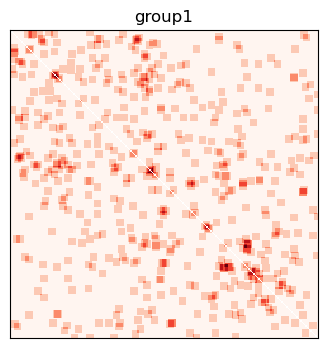

0.0 0.19444444444444448


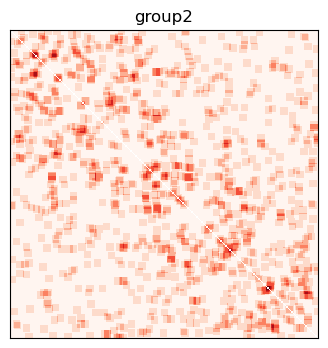

0.0 0.4722222222222223


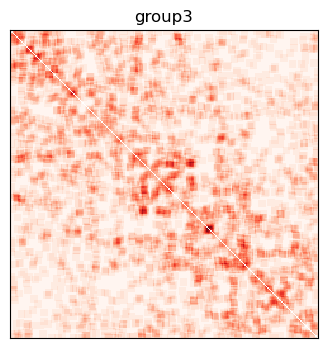

0.0 0.7777777777777779


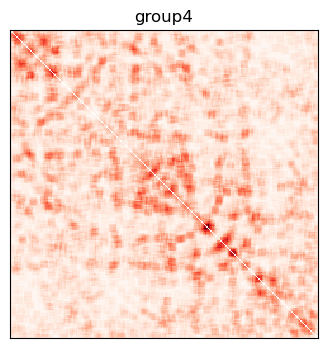

In [125]:
cmap="Reds"
vmin = 0.4
vmax = 1
copy = 0
plot_matrix(scale_matrix_to_range(hicrep_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(hicrep_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(hicrep_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(hicrep_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 2-SCL

In [ ]:
target = "Cell2020"
imputed_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/scl"
scl_matrix1 = np.load(f"{imputed_dir}/scl_imputed_{target}_group1.npy")
scl_matrix2 = np.load(f"{imputed_dir}/scl_imputed_{target}_group2.npy")
scl_matrix3 = np.load(f"{imputed_dir}/scl_imputed_{target}_group3.npy")
scl_matrix4 = np.load(f"{imputed_dir}/scl_imputed_{target}_group4.npy")
print(scl_matrix4.shape)
copy=0
cmap="Reds"
vmax=1.8
plot_matrix(scale_matrix_to_range(scl_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(scl_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(scl_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(scl_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 3-snap hic

In [27]:
target = "Cell2020"
method = "snap"
hicimpute_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/{method}"

snap_matrix1 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group1.npy")
snap_matrix2 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group2.npy")
snap_matrix3 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group3.npy")
snap_matrix4 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group4.npy")
print(snap_matrix4.shape)

(100, 243, 243)


0.0 1.948717948717948


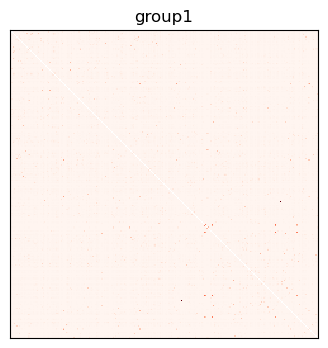

0.0 0.23074240440761495


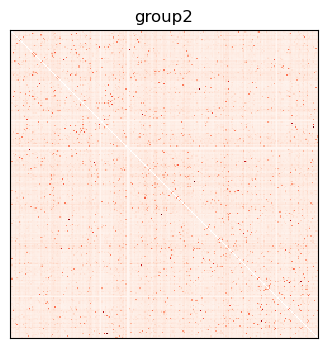

0.0 0.06507971583742836


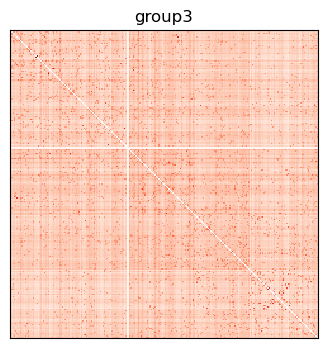

0.0 0.04912731573455773


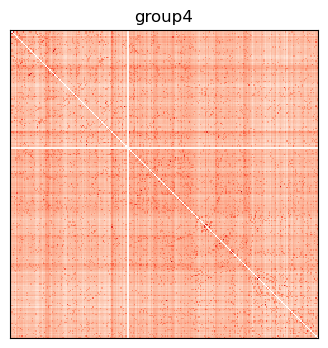

In [30]:
cmap="Reds"
vmin = 0.4
vmax = 1
copy = 0
plot_matrix(scale_matrix_to_range(snap_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(snap_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(snap_matrix3[copy]),"group3",cmap,vmin=0,vmax=1.2,show=False)
plot_matrix(scale_matrix_to_range(snap_matrix4[copy]),"group4",cmap,vmin=0,vmax=1.2,show=False)

## 4-genomDISCO

In [19]:
target = "Cell2020"
method = "genomdisco"
hicimpute_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/{method}"

genomdisco_matrix1 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group1.npy")
genomdisco_matrix2 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group2.npy")
genomdisco_matrix3 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group3.npy")
genomdisco_matrix4 = np.load(f"{hicimpute_dir}/{method}_imputed_{target}_group4.npy")
print(genomdisco_matrix4.shape)

(100, 243, 243)


0.0 1.0


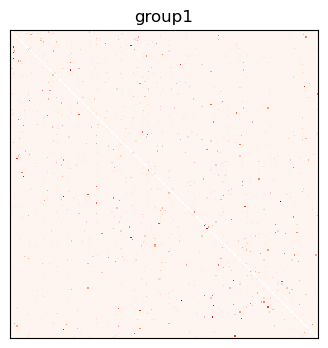

0.0 0.4469696969696969


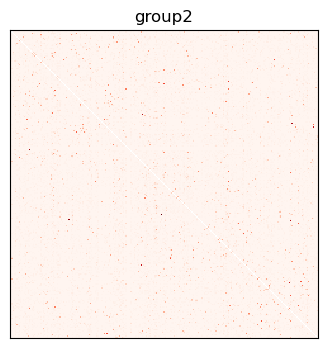

0.0 0.03876683256275093


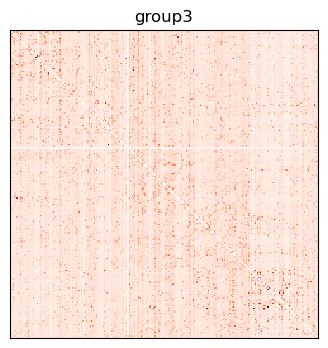

0.0 0.02145594053633912


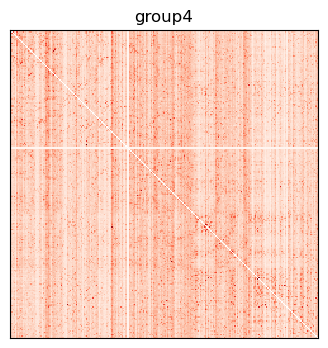

In [20]:
cmap="Reds"
vmin = 0.4
vmax = 1
copy = 0
plot_matrix(scale_matrix_to_range(genomdisco_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(genomdisco_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(genomdisco_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(genomdisco_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 5-ctg

In [11]:
target = "Cell2020"
hicimpute_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/ctg"

ctg_matrix1 = np.load(f"{hicimpute_dir}/ctg_imputed_{target}_group1.npy")
ctg_matrix2 = np.load(f"{hicimpute_dir}/ctg_imputed_{target}_group2.npy")
ctg_matrix3 = np.load(f"{hicimpute_dir}/ctg_imputed_{target}_group3.npy")
ctg_matrix4 = np.load(f"{hicimpute_dir}/ctg_imputed_{target}_group4.npy")
print(ctg_matrix1.shape)

(100, 243, 243)


-2.511574760499622 0.2361545972751527


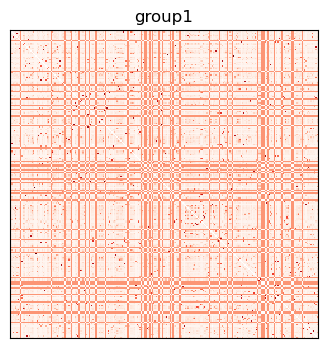

-2.1516967551917316 -0.3992042134927127


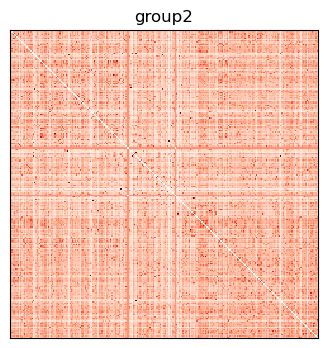

-1.6550954352204266 -0.5592443552496744


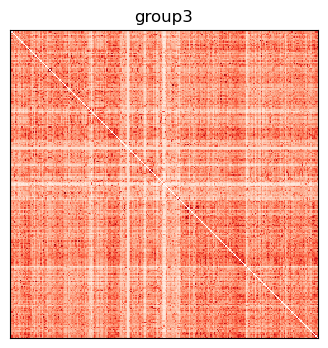

-1.5115747604996217 -0.05979944034309598


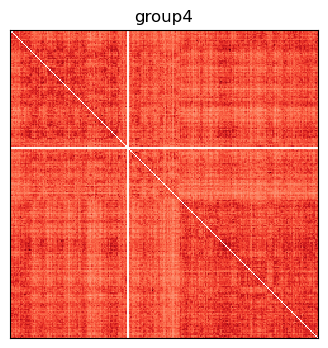

In [12]:
cmap="Reds"
vmin = 0.4
vmax = 1
copy = 30
plot_matrix(scale_matrix_to_range(ctg_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(ctg_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(ctg_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(ctg_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

(100, 243, 243)


## 6-Schicluster

In [19]:
target = "Cell2020"
imputed_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/schicluster"
schicluster_matrix1 = np.load(f"{imputed_dir}/schicluster_imputed_{target}_group1.npy")
schicluster_matrix2 = np.load(f"{imputed_dir}/schicluster_imputed_{target}_group2.npy")
schicluster_matrix3 = np.load(f"{imputed_dir}/schicluster_imputed_{target}_group3.npy")
schicluster_matrix4 = np.load(f"{imputed_dir}/schicluster_imputed_{target}_group4.npy")
print(schicluster_matrix1.shape)

(101, 243, 243)


-3.191597891059789 4.25228217942241


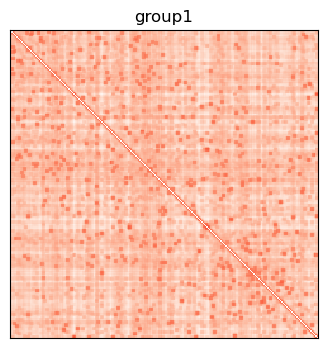

-2.56036050436463 3.329569085749432


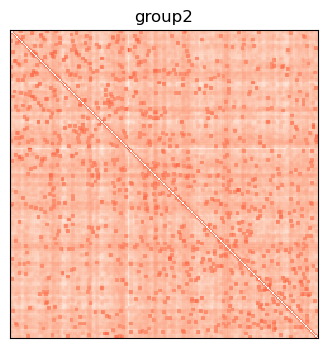

-1.3569532946435663 2.2469605268812454


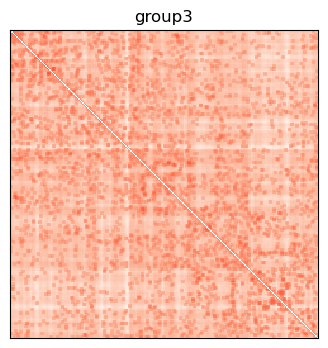

-1.155214442762983 2.0487125997000435


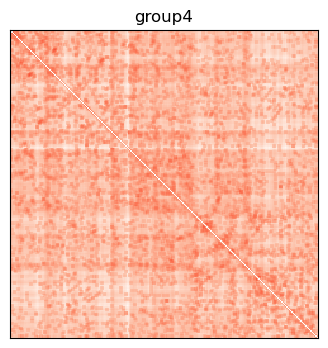

: 

In [128]:
copy=0
cmap="Reds"
vmax=1.8
plot_matrix(scale_matrix_to_range(schicluster_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(schicluster_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(schicluster_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(schicluster_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

(100, 243, 243)


## 7-Higashi

In [4]:
target = "Cell2020"
hicimpute_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/Higashi"

higashi_matrix1 = np.load(f"{hicimpute_dir}/higashi_imputed_{target}_group1.npy")
higashi_matrix2 = np.load(f"{hicimpute_dir}/higashi_imputed_{target}_group2.npy")
higashi_matrix3 = np.load(f"{hicimpute_dir}/higashi_imputed_{target}_group3.npy")
higashi_matrix4 = np.load(f"{hicimpute_dir}/higashi_imputed_{target}_group4.npy")
print(higashi_matrix4.shape)

(100, 244, 244)


0.0 1.8074467


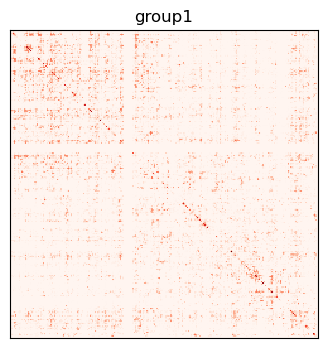

0.0 1.9771037


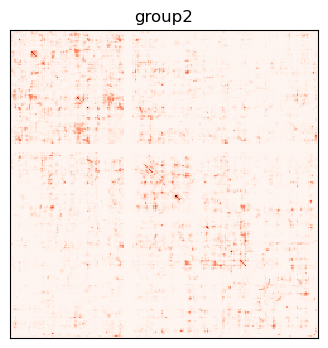

0.0 1.8832121


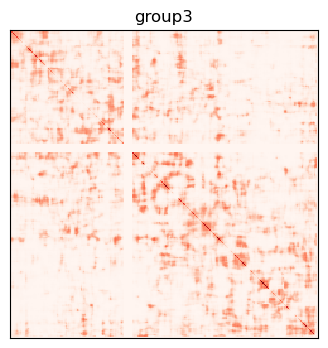

0.0 1.8623605


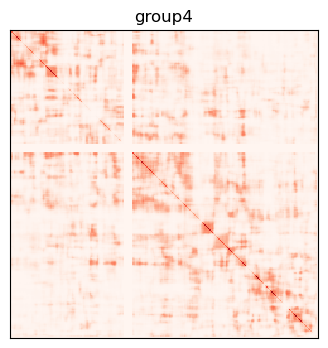

In [6]:
copy=0
cmap="Reds"
vmax=1
plot_matrix(scale_matrix_to_range(higashi_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(higashi_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(higashi_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(higashi_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 8-hicplus

In [31]:
target = "Cell2020"
method = "hicplus"
hicplus_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/{method}"

hicplus_matrix1 = np.load(f"{hicplus_dir}/{method}_imputed_{target}_group1.npy")
hicplus_matrix2 = np.load(f"{hicplus_dir}/{method}_imputed_{target}_group2.npy")
hicplus_matrix3 = np.load(f"{hicplus_dir}/{method}_imputed_{target}_group3.npy")
hicplus_matrix4 = np.load(f"{hicplus_dir}/{method}_imputed_{target}_group4.npy")
print(hicplus_matrix4.shape)

(100, 243, 243)


0.0 0.38223007321357727


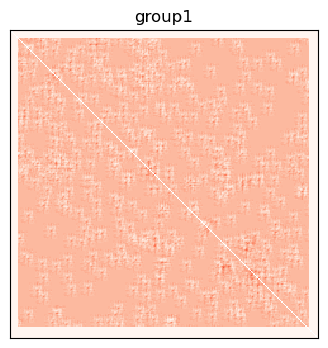

0.0 0.4504834711551666


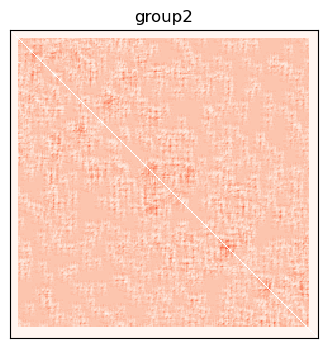

0.0 1.2076327800750732


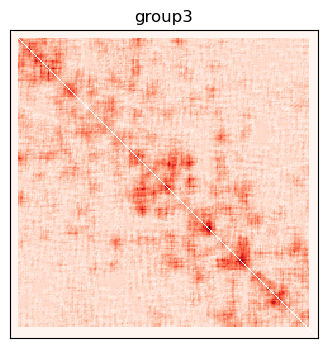

0.0 2.21317195892334


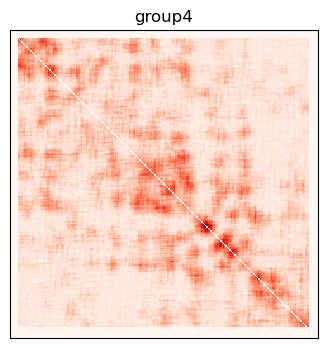

In [35]:
copy=0
cmap="Reds"
vmax=1
plot_matrix(scale_matrix_to_range(hicplus_matrix1[copy]),"group1",cmap,vmin=0,vmax=1.8,show=False)
plot_matrix(scale_matrix_to_range(hicplus_matrix2[copy]),"group2",cmap,vmin=0,vmax=1.8,show=False)
plot_matrix(scale_matrix_to_range(hicplus_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(hicplus_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 9-deephic

In [36]:
target = "Cell2020"
method = "deephic"
deep_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/{method}"

deep_matrix1 = np.load(f"{deep_dir}/{method}_imputed_{target}_group1.npy")
deep_matrix2 = np.load(f"{deep_dir}/{method}_imputed_{target}_group2.npy")
deep_matrix3 = np.load(f"{deep_dir}/{method}_imputed_{target}_group3.npy")
deep_matrix4 = np.load(f"{deep_dir}/{method}_imputed_{target}_group4.npy")
print(deep_matrix4.shape)

(100, 243, 243)


0.0 1.0


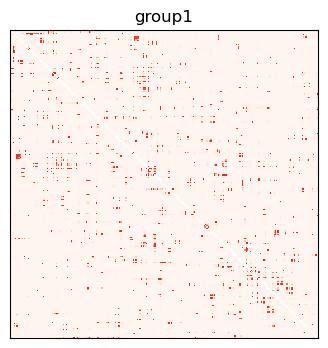

0.0 1.0


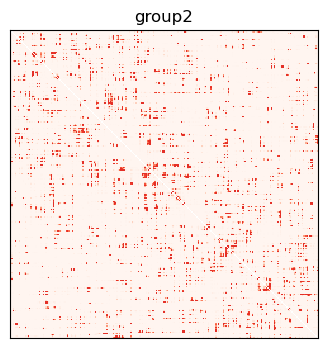

0.0 1.0


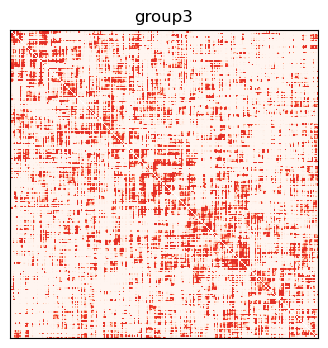

0.0 1.0


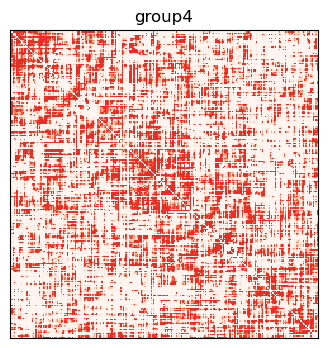

In [38]:
copy=0
cmap="Reds"
vmax=1.5
plot_matrix(scale_matrix_to_range(deep_matrix1[copy]),"group1",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(deep_matrix2[copy]),"group2",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(deep_matrix3[copy]),"group3",cmap,vmin=0,vmax=vmax,show=False)
plot_matrix(scale_matrix_to_range(deep_matrix4[copy]),"group4",cmap,vmin=0,vmax=vmax,show=False)

## 10-hicimpute

In [ ]:
target = "Cell2020"
hicimpute_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/hicimpute"

hicimpute_matrix1 = np.load(f"{hicimpute_dir}/hicimputed_{target}_1.npy")
hicimpute_matrix2 = np.load(f"{hicimpute_dir}/hicimputed_{target}_2.npy")
hicimpute_matrix3 = np.load(f"{hicimpute_dir}/hicimputed_{target}_3.npy")
hicimpute_matrix4 = np.load(f"{hicimpute_dir}/hicimputed_{target}_4.npy")
print(hicimpute_matrix1.shape)

copy = 0
cmap="Reds"
vmin = 0.4
plot_matrix(scale_matrix_to_range(hicimpute_matrix1[copy]),"group1",cmap,vmin=vmin,vmax=1,show=False)
plot_matrix(scale_matrix_to_range(hicimpute_matrix2[copy]),"group2",cmap,vmin=vmin,vmax=1,show=False)
plot_matrix(scale_matrix_to_range(hicimpute_matrix3[copy]),"group3",cmap,vmin=vmin,vmax=1,show=False)
plot_matrix(scale_matrix_to_range(hicimpute_matrix4[copy]),"group4",cmap,vmin=vmin,vmax=1,show=False)

## 11-hickit

In [2]:
def process_distance(A):

    np.fill_diagonal(A, np.nan)
    B = 1.0 / A
    # 计算新矩阵的和
    sum_B = np.nansum(B)
    
    # 将新矩阵的每个元素除以矩阵的和
    C = B / sum_B
    print(C)
    return 100*C

In [7]:

target = "Cell2020"
tdg_dir = "/shareb/mliu/evaluate_impute/data/imputed_data/hickit/Cell2020"
chrom_length_path = "/share/Data/public/ref_genome/human_ref/GRCh37d5/raw_data/hg19.chr.len"

resolution = 1000000

distance_matrix1 = []  # 存储所有相关矩阵
for copy in range(0,100):
    tdg_path = f"{tdg_dir}/{target}_group1_copy{copy}.1m.1.3dg"
    cell = Cell3D.Cell3D(cellname="cell", tdg_path=tdg_path, resolution=resolution)
    cell.add_chrom_length(chrom_length_path)
    mat = cell.calc_distance_matrix("chr2")
    distance_matrix1.append(process_distance(mat[0:243,0:243]))
distance_matrix1 = np.array(distance_matrix1)

distance_matrix2 = []  # 存储所有相关矩阵
for copy in range(0,100):
    tdg_path = f"{tdg_dir}/{target}_group2_copy{copy}.1m.1.3dg"
    cell = Cell3D.Cell3D(cellname="cell", tdg_path=tdg_path, resolution=resolution)
    cell.add_chrom_length(chrom_length_path)
    mat = cell.calc_distance_matrix("chr2")
    distance_matrix2.append(process_distance(mat[0:243,0:243]))
distance_matrix2 = np.array(distance_matrix2)


distance_matrix3 = []  # 存储所有相关矩阵
for copy in range(0,100):
    tdg_path = f"{tdg_dir}/{target}_group3_copy{copy}.1m.1.3dg"
    cell = Cell3D.Cell3D(cellname="cell", tdg_path=tdg_path, resolution=resolution)
    cell.add_chrom_length(chrom_length_path)
    mat = cell.calc_distance_matrix("chr2")
    distance_matrix3.append(process_distance(mat[0:243,0:243]))
distance_matrix3 = np.array(distance_matrix3)


distance_matrix4 = []  # 存储所有相关矩阵
for copy in range(0,100):
    tdg_path = f"{tdg_dir}/{target}_group4_copy{copy}.1m.1.3dg"
    cell = Cell3D.Cell3D(cellname="cell", tdg_path=tdg_path, resolution=resolution)
    cell.add_chrom_length(chrom_length_path)
    mat = cell.calc_distance_matrix("chr2")
    distance_matrix4.append(process_distance(mat[0:243,0:243]))
distance_matrix4 = np.array(distance_matrix4)

[[           nan 8.84420215e-05 4.79544560e-05 ... 1.63041850e-05
  1.97789130e-05 2.36737192e-05]
 [8.84420215e-05            nan 8.19278753e-05 ... 1.79839547e-05
  2.17190910e-05 2.77767078e-05]
 [4.79544560e-05 8.19278753e-05            nan ... 2.28362443e-05
  2.87928632e-05 4.16468111e-05]
 ...
 [1.63041850e-05 1.79839547e-05 2.28362443e-05 ...            nan
  8.19174673e-05 4.88239665e-05]
 [1.97789130e-05 2.17190910e-05 2.87928632e-05 ... 8.19174673e-05
             nan 7.96560914e-05]
 [2.36737192e-05 2.77767078e-05 4.16468111e-05 ... 4.88239665e-05
  7.96560914e-05            nan]]
[[           nan 3.52037438e-04 4.20250972e-04 ... 1.75919165e-05
  2.03578212e-05 2.01428813e-05]
 [3.52037438e-04            nan 1.97499003e-04 ... 1.70545504e-05
  1.96618135e-05 1.94330415e-05]
 [4.20250972e-04 1.97499003e-04            nan ... 1.82883410e-05
  2.12853954e-05 2.10646877e-05]
 ...
 [1.75919165e-05 1.70545504e-05 1.82883410e-05 ...            nan
  1.09826764e-04 1.37936486e-04]

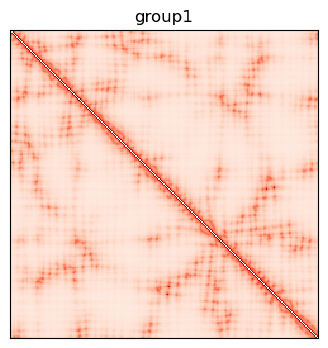

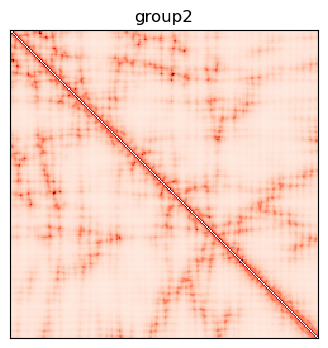

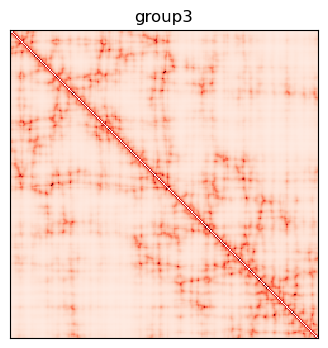

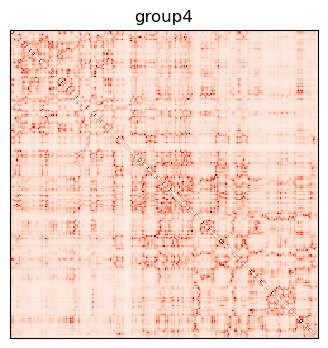

In [13]:
copy = 0
cmap="Reds"
vmin = 0
vmax = 0.01
plot_matrix(distance_matrix1[copy],"group1",cmap,vmin=vmin,vmax=vmax,show=False)
plot_matrix(distance_matrix2[copy],"group2",cmap,vmin=vmin,vmax=vmax,show=False)
plot_matrix(distance_matrix3[copy],"group3",cmap,vmin=vmin,vmax=vmax,show=False)
plot_matrix(distance_matrix4[copy],"group4",cmap,vmin=vmin,vmax=vmax,show=False)

In [14]:
tdg_dir = "/shareb/mliu/evaluate_impute/data/imputed_data/hickit"
save_path1= f"{tdg_dir}/hickit_imputed_Cell2020_group1.npy"
np.save(save_path1, distance_matrix1)
save_path2= f"{tdg_dir}/hickit_imputed_Cell2020_group2.npy"
np.save(save_path2, distance_matrix2)
save_path3= f"{tdg_dir}/hickit_imputed_Cell2020_group3.npy"
np.save(save_path3, distance_matrix3)
save_path4= f"{tdg_dir}/hickit_imputed_Cell2020_group4.npy"
np.save(save_path4, distance_matrix4)

(100, 243, 243)


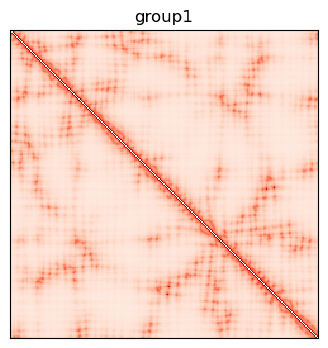

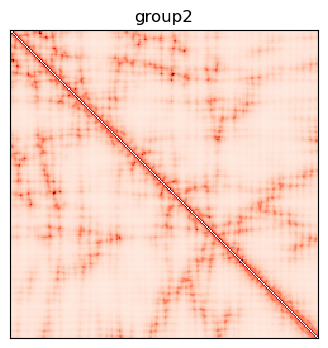

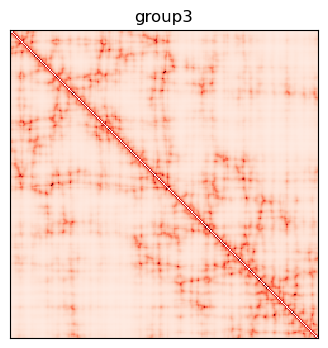

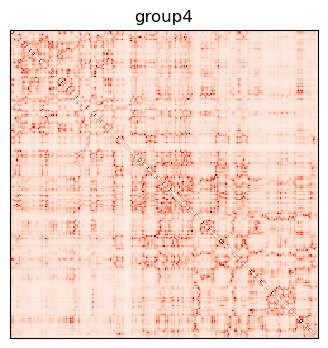

In [15]:
target = "Cell2020"
hickit_dir = f"/shareb/mliu/evaluate_impute/data/imputed_data/hickit"

hickit_matrix1 = np.load(f"{hickit_dir}/hickit_imputed_{target}_group1.npy")
hickit_matrix2 = np.load(f"{hickit_dir}/hickit_imputed_{target}_group2.npy")
hickit_matrix3 = np.load(f"{hickit_dir}/hickit_imputed_{target}_group3.npy")
hickit_matrix4 = np.load(f"{hickit_dir}/hickit_imputed_{target}_group4.npy")
print(hickit_matrix4.shape)

copy = 0
cmap="Reds"
vmin = 0
vmax = 0.01
plot_matrix(hickit_matrix1[copy],"group1",cmap,vmin=vmin,vmax=vmax,show=False)
plot_matrix(hickit_matrix2[copy],"group2",cmap,vmin=vmin,vmax=vmax,show=False)
plot_matrix(hickit_matrix3[copy],"group3",cmap,vmin=vmin,vmax=vmax,show=False)
plot_matrix(hickit_matrix4[copy],"group4",cmap,vmin=vmin,vmax=vmax,show=False)

NameError: name 'plot_matrix' is not defined